## 기본 라이브러리 불러오기

In [1]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

pd.set_option('display.max_column', None)

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

---
### 이상치 제거 함수

In [3]:
def check_outlier(_df, _column):
    # IQR 방법
    Q1 = _df[_column].quantile(0.25)
    Q3 = _df[_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = _df[~((_df[_column] < lower_bound) | (_df[_column] > upper_bound))]

    return outliers

In [4]:
init_path = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'

---
## 이상치패턴 저장데이터 다시 불러오기
 - 처음에 생성 한, "서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet" 파일이 정확도가 가장 높음
   - 차이가 뭔지 확인 필요!
   - 20241109 생성되면 정확도 추가 확인

In [5]:
start_time = time.time()
#df_outlier_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet')
# df_outlier_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024_20241107.parquet')
#df_outlier_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024_20241108.parquet')
df_outlier_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024_20241109.parquet')

print("read_csv time :", time.time() - start_time)

read_csv time : 2.3112661838531494


In [6]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,156.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,153.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,143.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0


In [7]:
df_outlier_rental['고장여부'].value_counts()

고장여부
1    28589
0     6645
Name: count, dtype: int64

---
## 23년 자전거대여 월별집계 내역 불러오기
 - 이거는 이상치 제거 한거나, 그냥 집계한거나 모델링 정확도에는 영향 없음

In [8]:
start_time = time.time()

df_2023_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)2023_자전거별_월별_집계_20241106.parquet')
# 이상치 제거
# df_2023_rental = pd.read_parquet(init_path + '서울특별시 공공자전거 대여이력 정보_(PRE)2023_자전거별_월별_집계_20241109.parquet')

print("read_csv time :", time.time() - start_time)

read_csv time : 3.599919319152832


In [9]:
df_2023_rental.shape[0]

43833

In [10]:
df_2023_rental.head(5)

,자전거번호,대여일자_count_1,대여일자_count_2,대여일자_count_3,대여일자_count_4,대여일자_count_5,대여일자_count_6,대여일자_count_7,대여일자_count_8,대여일자_count_9,대여일자_count_10,대여일자_count_11,대여일자_count_12,이용거리(M)_mean_1,이용거리(M)_mean_2,이용거리(M)_mean_3,이용거리(M)_mean_4,이용거리(M)_mean_5,이용거리(M)_mean_6,이용거리(M)_mean_7,이용거리(M)_mean_8,이용거리(M)_mean_9,이용거리(M)_mean_10,이용거리(M)_mean_11,이용거리(M)_mean_12,이용거리(M)_sum_1,이용거리(M)_sum_2,이용거리(M)_sum_3,이용거리(M)_sum_4,이용거리(M)_sum_5,이용거리(M)_sum_6,이용거리(M)_sum_7,이용거리(M)_sum_8,이용거리(M)_sum_9,이용거리(M)_sum_10,이용거리(M)_sum_11,이용거리(M)_sum_12,이용시간(분)_mean_1,이용시간(분)_mean_2,이용시간(분)_mean_3,이용시간(분)_mean_4,이용시간(분)_mean_5,이용시간(분)_mean_6,이용시간(분)_mean_7,이용시간(분)_mean_8,이용시간(분)_mean_9,이용시간(분)_mean_10,이용시간(분)_mean_11,이용시간(분)_mean_12,이용시간(분)_sum_1,이용시간(분)_sum_2,이용시간(분)_sum_3,이용시간(분)_sum_4,이용시간(분)_sum_5,이용시간(분)_sum_6,이용시간(분)_sum_7,이용시간(분)_sum_8,이용시간(분)_sum_9,이용시간(분)_sum_10,이용시간(분)_sum_11,이용시간(분)_sum_12,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean)
0,SPB-30001,126.0,111.0,195.0,104.0,121.0,162.0,141.0,119.0,175.0,123.0,117.0,46.0,1597.532540,2360.263423,2401.844256,3938.884712,2607.534463,2265.619877,2449.579078,1754.730588,2441.748571,2058.824472,1395.287778,1805.492174,201289.10,261989.24,468359.63,409644.01,315511.67,367030.42,345390.65,208812.94,427306.00,253235.41,163248.67,83052.64,14.079365,20.306306,19.205128,34.375000,20.727273,18.709877,21.680851,15.126050,21.040000,19.593496,18.564103,20.108696,1774.0,2254.0,3745.0,3575.0,2508.0,3031.0,3057.0,1800.0,3682.0,2410.0,2172.0,925.0,128.333333,2256.445161,292072.531667
1,SPB-30006,11.0,80.0,150.0,139.0,199.0,193.0,202.0,143.0,125.0,159.0,31.0,110.0,1468.723636,1717.237500,1920.765200,1798.489065,2225.908141,2427.211295,2482.220149,1585.403357,2791.540560,2172.033459,2026.211290,1124.839455,16155.96,137379.00,288114.78,249989.98,442955.72,468451.78,501408.47,226712.68,348942.57,345353.32,62812.55,123732.34,10.636364,17.650000,18.473333,20.064748,18.788945,22.217617,21.465347,17.524476,25.064000,19.396226,19.451613,11.436364,117.0,1412.0,2771.0,2789.0,3739.0,4288.0,4336.0,2506.0,3133.0,3084.0,603.0,1258.0,128.500000,1978.381926,267667.429167
2,SPB-30008,42.0,42.0,19.0,83.0,181.0,120.0,143.0,179.0,116.0,105.0,93.0,40.0,1222.382143,1878.965714,2277.800000,1902.278434,2182.769006,2227.949083,2630.634406,3092.678212,2912.774914,2275.691524,2009.036559,2134.287750,51340.05,78916.56,43278.20,157889.11,395081.19,267353.89,376180.72,553589.40,337881.89,238947.61,186840.40,85371.51,11.976190,15.785714,19.315789,14.228916,16.508287,16.083333,20.923077,22.312849,22.620690,21.133333,19.978495,20.675000,503.0,663.0,367.0,1181.0,2988.0,1930.0,2992.0,3994.0,2624.0,2219.0,1858.0,827.0,96.916667,2228.937312,231055.877500
3,SPB-30009,NaN,70.0,111.0,172.0,20.0,12.0,49.0,117.0,78.0,94.0,NaN,NaN,NaN,2058.221429,1763.318829,2071.568488,3322.989000,2160.264167,1741.867347,1863.074444,2127.794615,1845.711702,NaN,NaN,NaN,144075.50,195728.39,356309.78,66459.78,25923.17,85351.50,217979.71,165967.98,173496.90,NaN,NaN,NaN,15.542857,18.639640,18.023256,32.100000,60.416667,13.836735,25.111111,22.397436,23.712766,NaN,NaN,NaN,1088.0,2069.0,3100.0,642.0,725.0,678.0,2938.0,1747.0,2229.0,NaN,NaN,80.333333,2106.090002,159032.523333
4,SPB-30010,65.0,115.0,151.0,167.0,163.0,234.0,151.0,102.0,135.0,150.0,51.0,37.0,1336.259538,1630.415913,1733.082848,1947.733293,1720.982454,2153.064017,1968.328874,1885.984510,2117.909704,1928.055867,1192.914902,1635.178919,86856.87,187497.83,261695.51,325271.46,280520.14,503816.98,297217.66,192370.42,285917.81,289208.38,60838.66,60501.62,14.907692,15.069565,16.993377,18.802395,20.294479,18.598291,16.827815,14.715686,15.896296,16.053333,12.588235,15.675676,969.0,1733.0,2566.0,3140.0,3308.0,4352.0,2541.0,1501.0,2146.0,2408.0,642.0,580.0,126.750000,1770.825903,235976.111667


In [11]:
df_2023_rental.columns

Index(['자전거번호', '대여일자_count_1', '대여일자_count_2', '대여일자_count_3', '대여일자_count_4',
       '대여일자_count_5', '대여일자_count_6', '대여일자_count_7', '대여일자_count_8',
       '대여일자_count_9', '대여일자_count_10', '대여일자_count_11', '대여일자_count_12',
       '이용거리(M)_mean_1', '이용거리(M)_mean_2', '이용거리(M)_mean_3', '이용거리(M)_mean_4',
       '이용거리(M)_mean_5', '이용거리(M)_mean_6', '이용거리(M)_mean_7', '이용거리(M)_mean_8',
       '이용거리(M)_mean_9', '이용거리(M)_mean_10', '이용거리(M)_mean_11',
       '이용거리(M)_mean_12', '이용거리(M)_sum_1', '이용거리(M)_sum_2', '이용거리(M)_sum_3',
       '이용거리(M)_sum_4', '이용거리(M)_sum_5', '이용거리(M)_sum_6', '이용거리(M)_sum_7',
       '이용거리(M)_sum_8', '이용거리(M)_sum_9', '이용거리(M)_sum_10', '이용거리(M)_sum_11',
       '이용거리(M)_sum_12', '이용시간(분)_mean_1', '이용시간(분)_mean_2', '이용시간(분)_mean_3',
       '이용시간(분)_mean_4', '이용시간(분)_mean_5', '이용시간(분)_mean_6', '이용시간(분)_mean_7',
       '이용시간(분)_mean_8', '이용시간(분)_mean_9', '이용시간(분)_mean_10',
       '이용시간(분)_mean_11', '이용시간(분)_mean_12', '이용시간(분)_sum_1', '이용시간(분)_sum_2',
       '이용시간(분)_sum_3', '이

In [12]:
df_2023_rental = df_2023_rental[['자전거번호', '대여일자_count(mean)', '이용거리(M)_mean(mean)', '이용거리(M)_sum(mean)']]

In [13]:
df_outlier_rental = pd.merge(df_outlier_rental, df_2023_rental, on='자전거번호', how='inner')

In [14]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean)
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.500000,1978.381926,267667.429167
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.750000,1770.825903,235976.111667
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,156.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0,101.000000,2214.580818,230862.455455
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,153.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0,84.636364,1931.965198,166086.906364
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,143.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0,77.300000,1651.201903,136984.092000


---
### 23년 월별평균 <-> 한달 이전데이터 비교 컬럼 추가

In [15]:
# 고장 자전거는 23년 월별평균보다, 이전 한달 데이터가 더 적을 것이라는 가정
df_outlier_rental['이용횟수_비교'] = ee.ss_compare(df_outlier_rental['대여일자_count(mean)'], df_outlier_rental['이전일자_1mon_이용횟수'])
df_outlier_rental['이용거리_비교'] = ee.ss_compare(df_outlier_rental['이용거리(M)_sum(mean)'], df_outlier_rental['이전일자_1mon_이용거리'])

In [16]:
df_outlier_rental['이용횟수_비교(절대값)'] = df_outlier_rental['이용횟수_비교'].abs()
df_outlier_rental['이용거리_비교(절대값)'] = df_outlier_rental['이용거리_비교'].abs()

---
### 이상패턴_비율, 이용횟수_비교(이진) 컬럼 추가

In [17]:
# df_outlier_rental['이상패턴_비율'] = (df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['대여일자_count(mean)']) * 100
#df_outlier_rental['이상패턴_비율'] = (df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['대여일자_count(mean)'])
df_outlier_rental['이상패턴_비율'] = df_outlier_rental['이상패턴_5min_횟수'] / df_outlier_rental['이전일자_1mon_이용횟수'] * 100

In [18]:
# "이용횟수_비교" 컬럼을 기준으로 "이용횟수_비교(이진)" 컬럼 생성
df_outlier_rental['이용횟수_비교(이진)'] = df_outlier_rental['이용횟수_비교'].apply(lambda x: 1 if x < 0 else 0)

In [19]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.500000,1978.381926,267667.429167,-42.41,-63.32,42.41,63.32,2.702703,1
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.750000,1770.825903,235976.111667,-4.54,-1.83,4.54,1.83,4.132231,1
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,156.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0,101.000000,2214.580818,230862.455455,54.46,45.17,54.46,45.17,4.487179,0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,153.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0,84.636364,1931.965198,166086.906364,80.77,75.37,80.77,75.37,1.307190,0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,143.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0,77.300000,1651.201903,136984.092000,84.99,84.98,84.99,84.98,4.895105,0


In [20]:
df_outlier_rental[df_outlier_rental['고장여부'] == 0].head(10)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
28418,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,49.0,669926.15,5720.0,64.0,96.916667,2228.937312,231055.877500,-10.23,-1.04,10.23,1.04,0.000000,1
28419,SPB-30090,2024-03-09,2024-02-09,2024-01-09,2024-04-09,,0,1,1,1,126435.51,1063.0,60.0,214730.08,2104.0,37.0,271113.41,2734.0,53.0,96.916667,1713.354428,169539.868333,-38.09,-25.42,38.09,25.42,1.666667,1
28420,SPB-30100,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,3,4,4,397466.93,3465.0,199.0,625579.79,5704.0,52.0,865354.02,8016.0,80.0,127.416667,2128.085889,285621.380833,56.18,39.16,56.18,39.16,1.507538,0
28421,SPB-30110,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,2,3,4,188264.49,1522.0,93.0,372184.58,2977.0,42.0,512387.48,4058.0,58.0,60.666667,2152.908730,135201.706667,53.30,39.25,53.30,39.25,2.150538,0
28422,SPB-30113,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,6,6,7,501725.48,3757.0,196.0,952090.56,7296.0,55.0,1400630.42,10824.0,83.0,123.909091,2096.946220,259270.192727,58.18,93.51,58.18,93.51,3.061224,0
28423,SPB-30121,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,1,1,1,272007.66,2520.0,130.0,458678.31,3942.0,45.0,622281.68,5507.0,56.0,102.500000,2232.782984,226340.036667,26.83,20.18,26.83,20.18,0.769231,0
28424,SPB-30123,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,0,0,0,160069.80,1332.0,72.0,441989.88,3731.0,38.0,764740.05,6351.0,66.0,114.000000,1780.868169,208887.062500,-36.84,-23.37,36.84,23.37,0.000000,1
28425,SPB-30124,2024-02-23,2024-01-23,2023-12-23,2024-03-23,,0,1,1,2,139860.79,1240.0,85.0,236423.78,1962.0,36.0,238869.38,1976.0,37.0,113.333333,2055.197946,240300.575556,-25.00,-41.80,25.00,41.80,1.176471,1
28426,SPB-30125,2024-05-29,2024-04-29,2024-03-29,2024-06-29,,0,5,6,6,253016.10,2212.0,151.0,511402.65,4406.0,46.0,791867.67,6757.0,74.0,109.545455,1926.230098,243026.332727,37.84,4.11,37.84,4.11,3.311258,0
28427,SPB-30143,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,5,6,6,306571.69,2620.0,139.0,528410.75,4642.0,48.0,689214.02,6115.0,70.0,90.333333,2127.113268,199798.666667,53.87,53.44,53.87,53.44,3.597122,0


In [21]:
df_Bike_latest_2 = df_outlier_rental

In [22]:
df_Bike_latest_2.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.500000,1978.381926,267667.429167,-42.41,-63.32,42.41,63.32,2.702703,1
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.750000,1770.825903,235976.111667,-4.54,-1.83,4.54,1.83,4.132231,1
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,156.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0,101.000000,2214.580818,230862.455455,54.46,45.17,54.46,45.17,4.487179,0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,153.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0,84.636364,1931.965198,166086.906364,80.77,75.37,80.77,75.37,1.307190,0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,143.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0,77.300000,1651.201903,136984.092000,84.99,84.98,84.99,84.98,4.895105,0


---
### 이용거리_비교 - 무한값(inf) 설정관련

In [23]:
# 무한대 값 확인
inf_check = df_Bike_latest_2.isin([np.inf, -np.inf])

print("무한대 값 위치:")
print(inf_check)

# 무한대 값이 있는 열 확인
columns_with_inf = df_Bike_latest_2.columns[inf_check.any()].tolist()
print("\n무한대 값이 있는 열:", columns_with_inf)

# 무한대 값의 개수 확인
inf_count = df_Bike_latest_2.isin([np.inf, -np.inf]).sum().sum()
print("\n전체 무한대 값의 개수:", inf_count)

무한대 값 위치:
       자전거번호  이전일자_1mon  이전일자_2mon  이전일자_3mon  등록대여일자   고장구분   고장여부  \
0      False      False      False      False   False  False  False   
1      False      False      False      False   False  False  False   
2      False      False      False      False   False  False  False   
3      False      False      False      False   False  False  False   
4      False      False      False      False   False  False  False   
...      ...        ...        ...        ...     ...    ...    ...   
34894  False      False      False      False   False  False  False   
34895  False      False      False      False   False  False  False   
34896  False      False      False      False   False  False  False   
34897  False      False      False      False   False  False  False   
34898  False      False      False      False   False  False  False   

       이상패턴_5min_횟수  이상패턴_7min_횟수  이상패턴_10min_횟수  이전일자_1mon_이용거리  \
0             False         False          False           False   
1

In [24]:
df_Bike_latest_2 = df_Bike_latest_2.replace([np.inf, -np.inf], np.nan).dropna()

In [25]:
# 무한대 값의 개수 확인
inf_count = df_Bike_latest_2.isin([np.inf, -np.inf]).sum().sum()
print("\n전체 무한대 값의 개수:", inf_count)


전체 무한대 값의 개수: 0


---
### 결측치 확인 및 제거

In [26]:
df_Bike_latest_2.isnull().mean()

자전거번호                 0.0
이전일자_1mon             0.0
이전일자_2mon             0.0
이전일자_3mon             0.0
등록대여일자                0.0
고장구분                  0.0
고장여부                  0.0
이상패턴_5min_횟수          0.0
이상패턴_7min_횟수          0.0
이상패턴_10min_횟수         0.0
이전일자_1mon_이용거리        0.0
이전일자_1mon_이용시간        0.0
이전일자_1mon_이용횟수        0.0
이전일자_2mon_이용거리        0.0
이전일자_2mon_이용시간        0.0
이전일자_2mon_이용횟수        0.0
이전일자_3mon_이용거리        0.0
이전일자_3mon_이용시간        0.0
이전일자_3mon_이용횟수        0.0
대여일자_count(mean)      0.0
이용거리(M)_mean(mean)    0.0
이용거리(M)_sum(mean)     0.0
이용횟수_비교               0.0
이용거리_비교               0.0
이용횟수_비교(절대값)          0.0
이용거리_비교(절대값)          0.0
이상패턴_비율               0.0
이용횟수_비교(이진)           0.0
dtype: float64

In [27]:
pip install missingno

     --------------------------------------- 44.8/44.8 MB 28.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


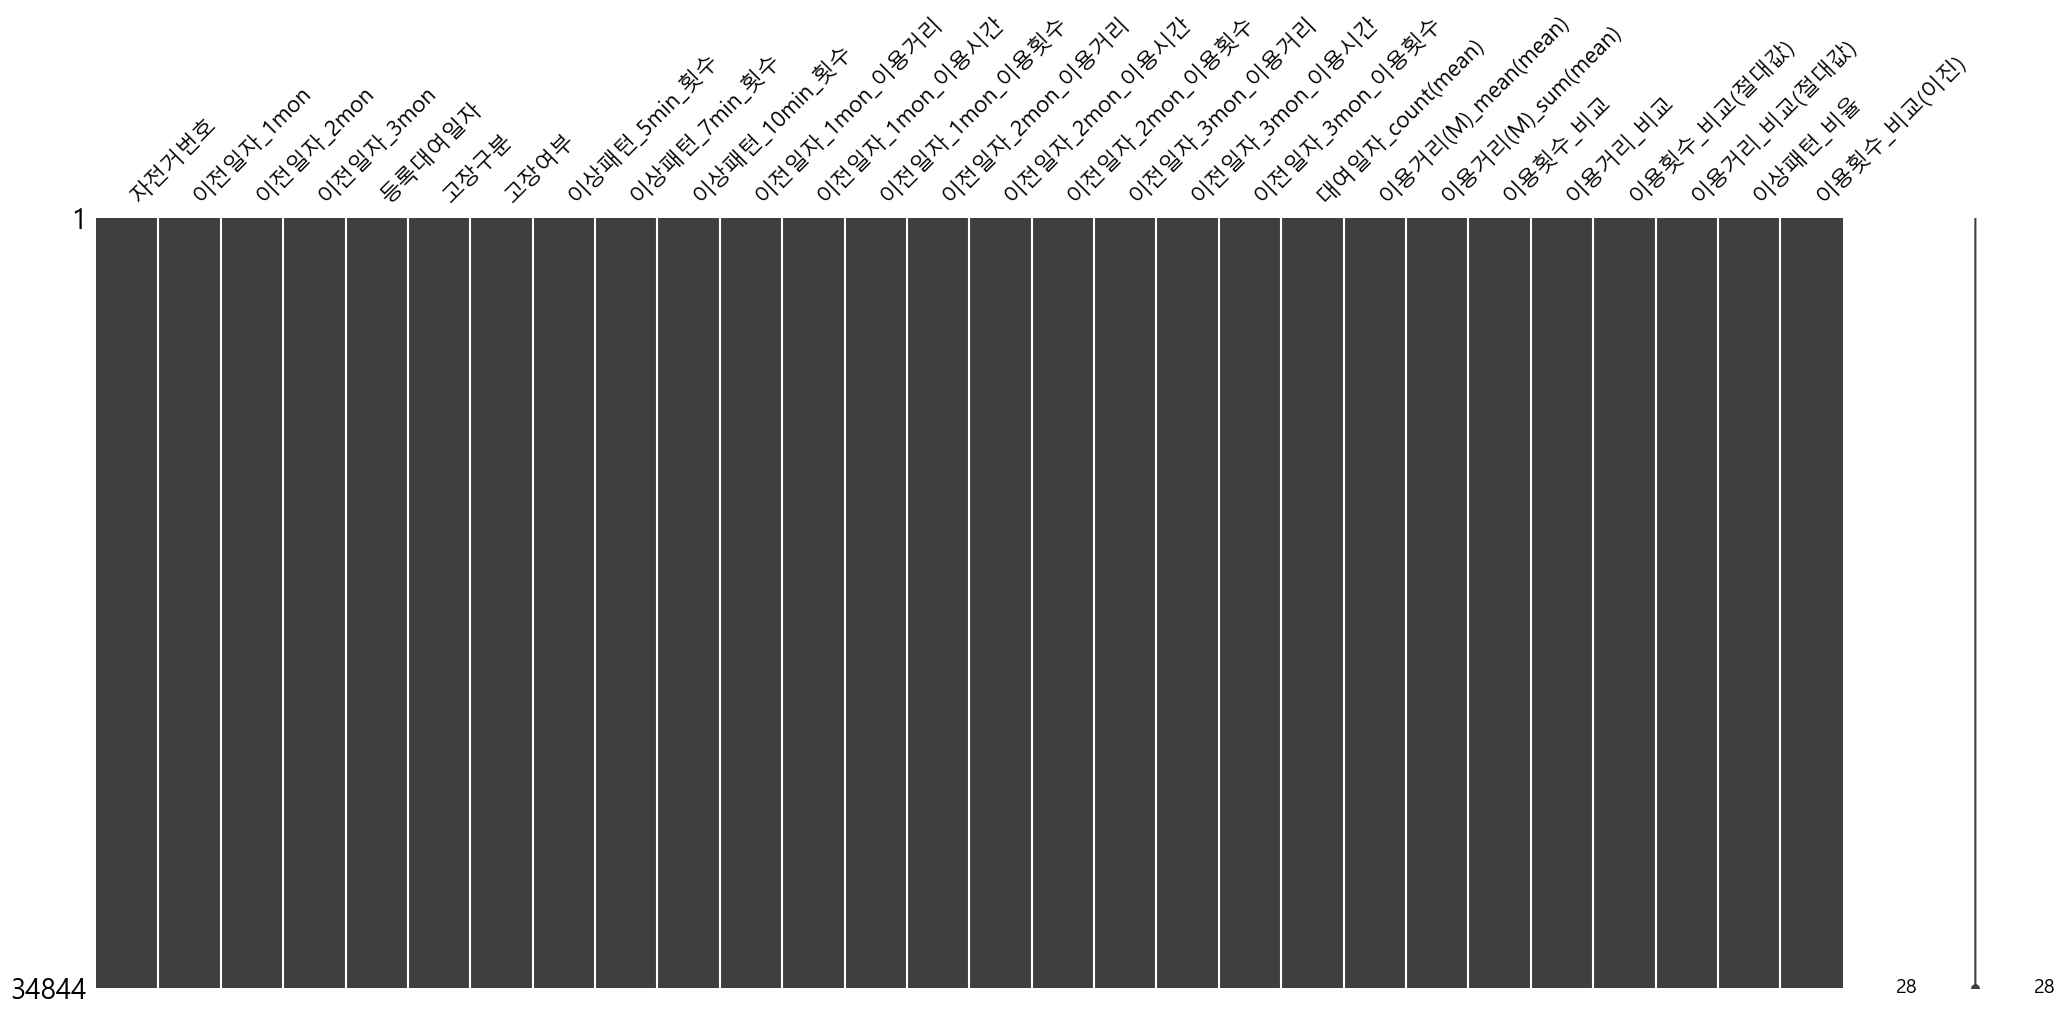

In [28]:
import missingno as msno
# 결측치 매트릭스 시각화
msno.matrix(df_Bike_latest_2)
plt.show()

In [29]:
df_Bike_latest_2 = df_Bike_latest_2.dropna()

---
## 고장횟수 별 - 고장비율
 - 고장 : 24년의 마지막고장신고
 - 정상 : 24년의 마지막 대여일

### [전체] 고장여부 비율

In [30]:
counts = df_Bike_latest_2['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 34844
counts : 고장여부
1    28367
0     6477
Name: count, dtype: int64
percentage : 고장여부
1    81.411434
0    18.588566
Name: count, dtype: float64


In [31]:
df_Bike_latest_2_0 = df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0][:6477]   # 6477 / 13139
df_Bike_latest_2_1 = df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 1][:6477]

In [32]:
df_Bike_latest_2 = pd.concat([df_Bike_latest_2_0, df_Bike_latest_2_1], axis = 0)

In [33]:
print(f'df_Bike_latest_2_0.shape[0] : {df_Bike_latest_2_0.shape[0]}')
print(f'df_Bike_latest_2_1.shape[0] : {df_Bike_latest_2_1.shape[0]}')
print(f'df_Bike_latest_2.shape[0] : {df_Bike_latest_2.shape[0]}')

df_Bike_latest_2_0.shape[0] : 6477
df_Bike_latest_2_1.shape[0] : 6477
df_Bike_latest_2.shape[0] : 12954


---
## 고장여부 에 따른 고장횟수

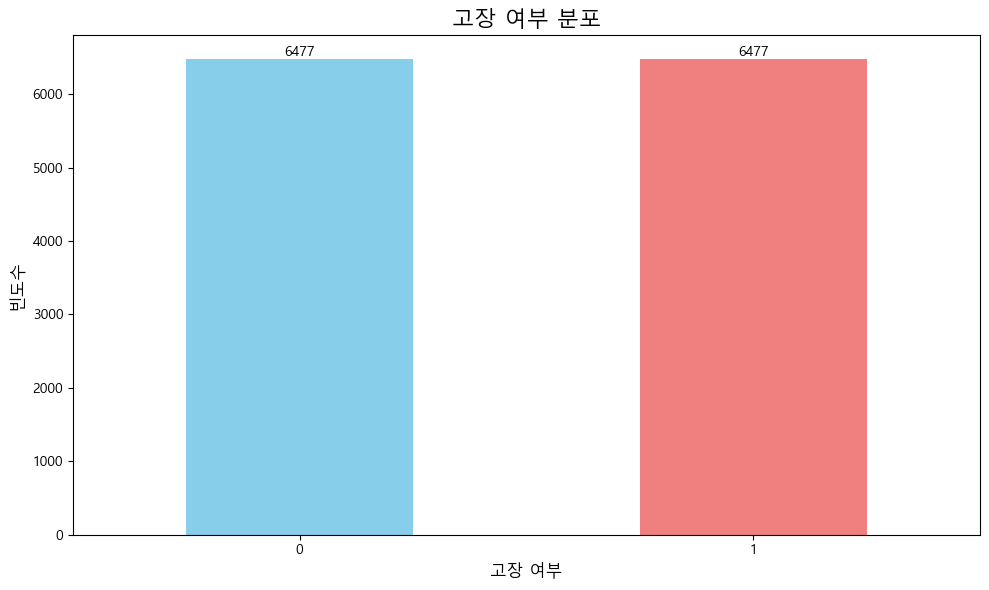

In [34]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
gojang_counts = df_Bike_latest_2['고장여부'].value_counts()
# 그래프 크기 설정
plt.figure(figsize=(10, 6))
# 막대 그래프 그리기
gojang_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
# 그래프 꾸미기
plt.title('고장 여부 분포', fontsize=16)
plt.xlabel('고장 여부', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=0)

# 각 막대 위에 값 표시
for i, v in enumerate(gojang_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

---
### subplot multi 함수선언

In [35]:
# 서브플롯 생성 함수
def create_bi_subplot(_df, _columns):
    plt.figure(figsize=(15, 6))

    # 전체 데이터에서 x축 범위 계산
    # x_min = min(_df[_columns[0]].min(),
    #             _df[_columns[1]].min(),
    #             _df[_columns[2]].min())
    # x_max = max(_df[_columns[0]].max(),
    #             _df[_columns[1]].max(),
    #             _df[_columns[2]].max())
    x_min = _df[_columns[0]].min()
    x_max = _df[_columns[0]].max()

    # 최대 빈도수 계산
    max_count = 0
    for j in [0, 1]:
        for _column in _columns:
            data = _df[_df['고장여부'] == j][_column]
            counts, _ = np.histogram(data, bins=10)
            max_count = max(max_count, counts.max())


    position = 1
    for j in list(range(0, 2)):
        for i, _column in enumerate(_columns):
            data = _df[_df['고장여부'] == j][_column]
            title = f'(고장={str(j)}) {_column} 분포'
            xlabel = _column
            _color = 'lightgreen' if j== 1 else 'skyblue'

            plt.subplot(1, 2, position)
            sns.histplot(data, bins=10, kde=True, color=_color)
            plt.title(title)
            plt.xlabel(xlabel)
            plt.ylabel('빈도수')
            plt.xlim(x_min, x_max)
            plt.ylim(0, max_count * 1.1)  # y축 범위 통일

            # x축의 지수 표현 제거
            #plt.ticklabel_format(axis="x", style="plain")

            position = position + 1

    plt.tight_layout()
    plt.show()

In [36]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0].head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
28418,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,49.0,669926.15,5720.0,64.0,96.916667,2228.937312,231055.877500,-10.23,-1.04,10.23,1.04,0.000000,1
28419,SPB-30090,2024-03-09,2024-02-09,2024-01-09,2024-04-09,,0,1,1,1,126435.51,1063.0,60.0,214730.08,2104.0,37.0,271113.41,2734.0,53.0,96.916667,1713.354428,169539.868333,-38.09,-25.42,38.09,25.42,1.666667,1


In [37]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 1].head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.50,1978.381926,267667.429167,-42.41,-63.32,42.41,63.32,2.702703,1
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.75,1770.825903,235976.111667,-4.54,-1.83,4.54,1.83,4.132231,1


In [38]:
df_Bike_latest_2.sort_values(by = '이전일자_1mon_이용횟수', ascending = False).head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
29702,SPB-41031,2024-05-12,2024-04-12,2024-03-12,2024-06-12,,0,3,3,3,1092647.18,9611.0,401.0,1842323.06,15937.0,61.0,2712216.65,23856.0,92.0,89.444444,2004.625958,188049.384444,348.32,481.04,348.32,481.04,0.748130,0
31956,SPB-69804,2024-05-30,2024-04-30,2024-03-30,2024-06-30,,0,2,2,2,905282.60,8938.0,391.0,1924810.59,18175.0,62.0,2790183.49,25114.0,92.0,132.000000,2572.804148,350190.000000,196.21,158.51,196.21,158.51,0.511509,0
31975,SPB-70324,2024-05-29,2024-04-29,2024-03-29,2024-06-29,,0,6,7,8,1139253.96,10492.0,386.0,1931258.18,17606.0,56.0,2628339.64,23041.0,76.0,2.000000,1900.000000,3800.000000,19200.00,29880.37,19200.00,29880.37,1.554404,0


In [39]:
# df_Bike_latest_3.columns
_columns = ['이상패턴_5min_횟수',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수']
grb_Bike_latest_3 = df_Bike_latest_2.groupby(['고장여부'])[_columns].agg('mean')

In [40]:
grb_Bike_latest_3.columns

Index(['이상패턴_5min_횟수', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수'], dtype='object')

In [41]:
grb_Bike_latest_3.isnull().sum()

이상패턴_5min_횟수      0
이전일자_1mon_이용거리    0
이전일자_1mon_이용시간    0
이전일자_1mon_이용횟수    0
dtype: int64

In [42]:
print(df_Bike_latest_2.shape[0])
print(df_Bike_latest_2[df_Bike_latest_2['이상패턴_비율'] > 0].shape[0])

12954
11716


---
## 이상패턴_비율(고장=1, 고장=0) 시각화

In [43]:
print(df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0]['이상패턴_비율'].min())
print(df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0]['이상패턴_비율'].max())

0.0
100.0


In [44]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 0]['이상패턴_비율'].value_counts()

이상패턴_비율
0.000000     663
11.111111     76
12.500000     69
9.090909      66
10.000000     66
            ... 
24.390244      1
10.619469      1
9.333333       1
17.307692      1
11.688312      1
Name: count, Length: 1255, dtype: int64

In [45]:
df_Bike_latest_2[df_Bike_latest_2['고장여부'] == 1]['이상패턴_비율'].value_counts()

이상패턴_비율
0.000000     575
4.000000      49
4.347826      47
3.225806      43
6.250000      39
            ... 
17.567568      1
1.454545       1
6.204380       1
17.948718      1
7.762557       1
Name: count, Length: 1615, dtype: int64

In [46]:
_columns = ['이상패턴_비율']
cond1 = df_Bike_latest_2['이상패턴_5min_횟수'] > 5
cond2 = df_Bike_latest_2['이상패턴_비율'] < 0.5
df_Bike_latest_2[cond1 & cond2].shape[0]

0

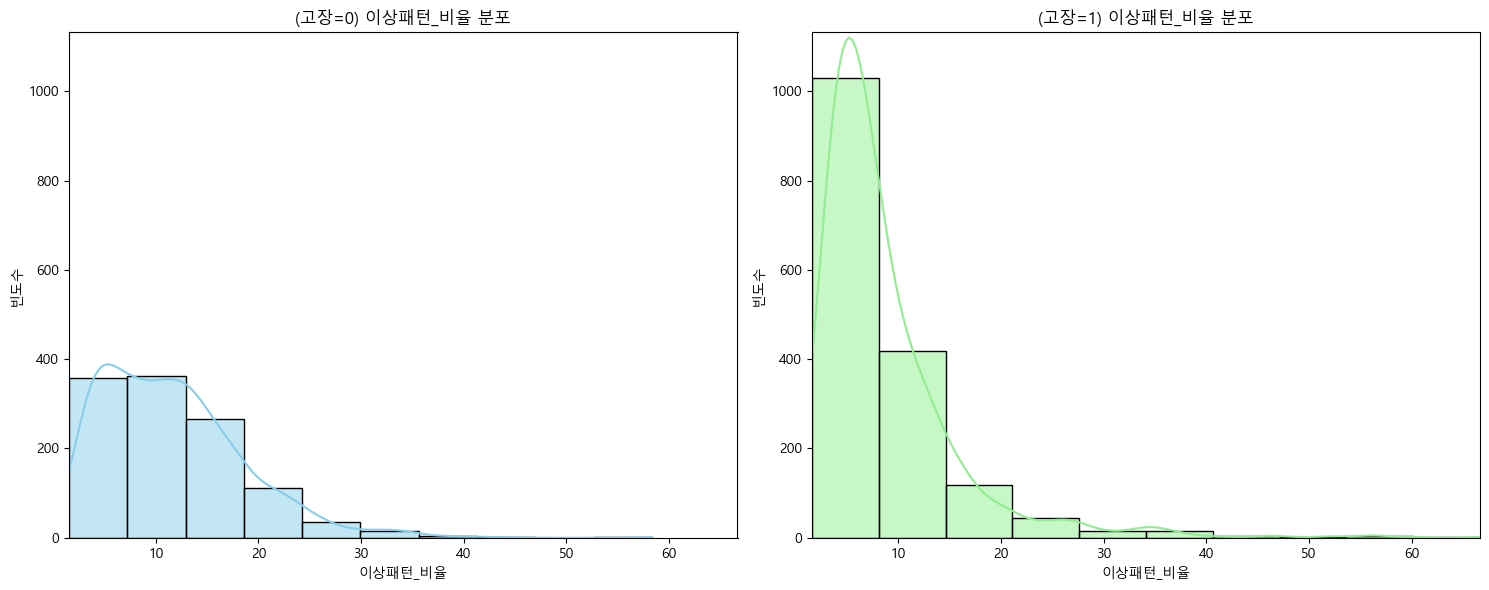

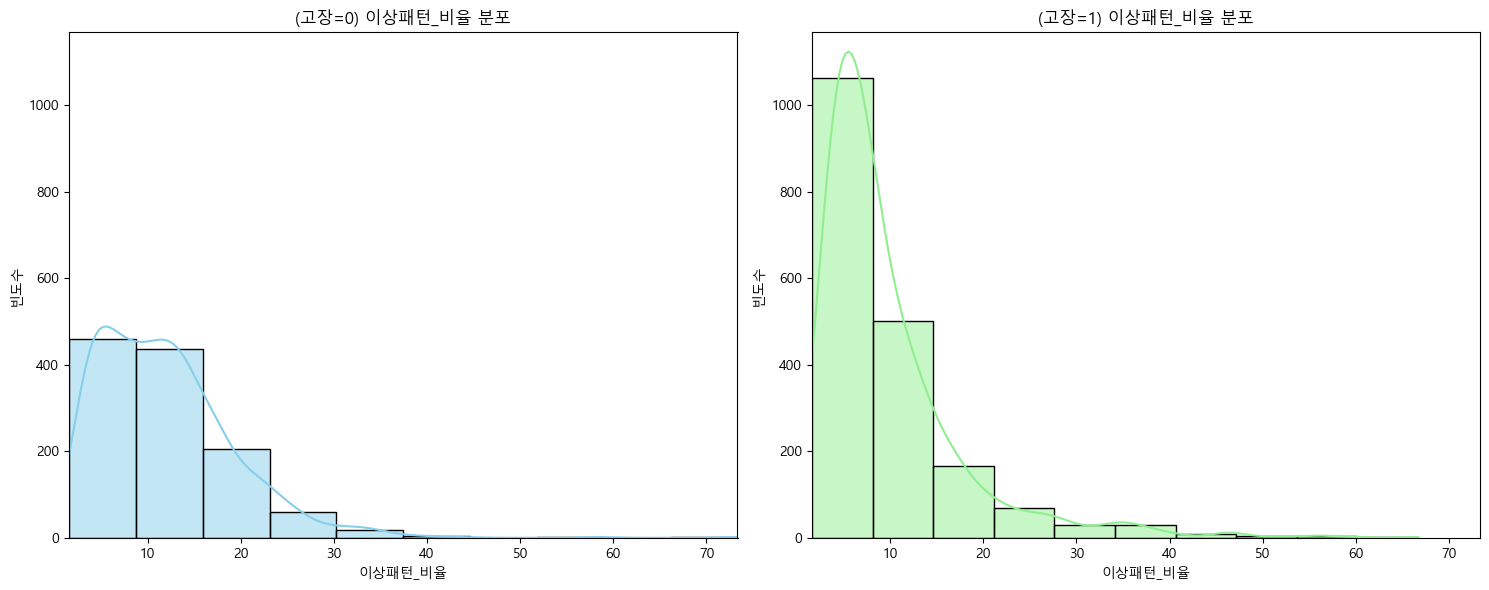

In [47]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

_columns = ['이상패턴_비율']
cond1 = df_Bike_latest_2['이상패턴_5min_횟수'] > 5
cond2 = df_Bike_latest_2['이상패턴_비율'] < 0.5
cond3 = df_Bike_latest_2['이상패턴_비율'] > 0
create_bi_subplot(check_outlier(df_Bike_latest_2[cond1], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[cond1], _columns)
# create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이상패턴_5min_횟수(고장=1, 고장=0) 시각화

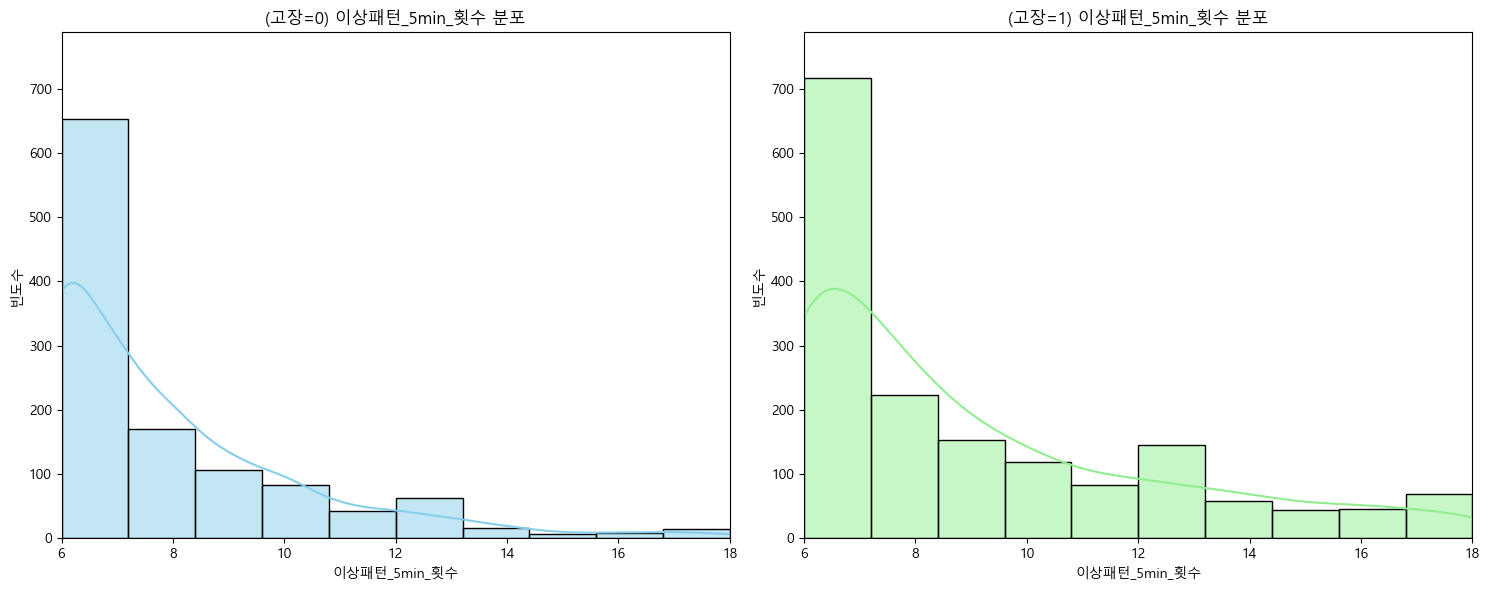

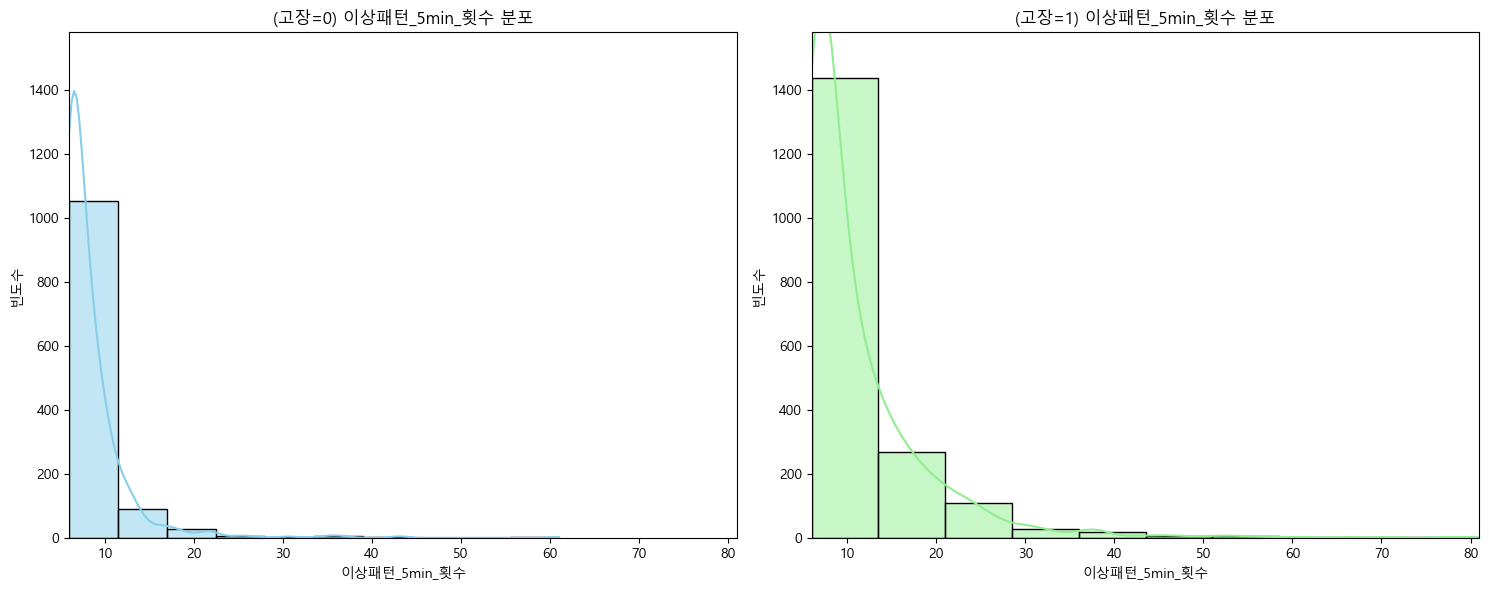

In [48]:
_columns = ['이상패턴_5min_횟수']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
# create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이전일자_1mon_이용거리(고장=1, 고장=0) 시각화

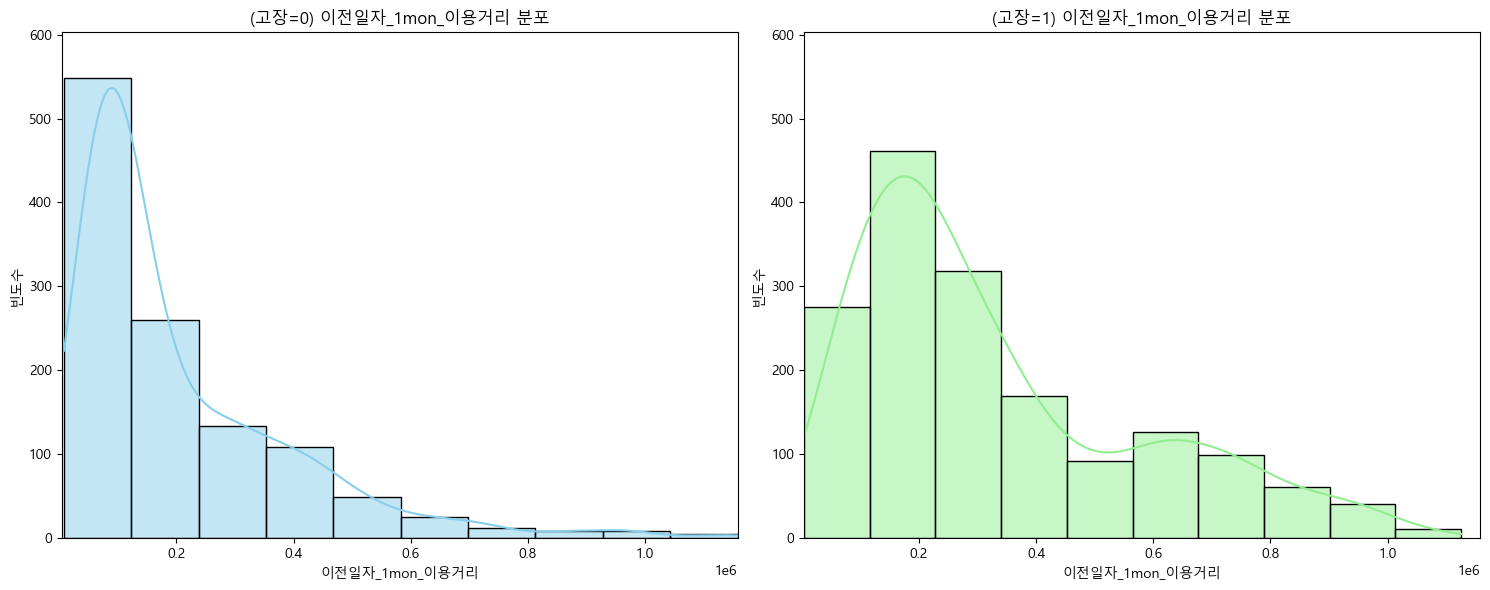

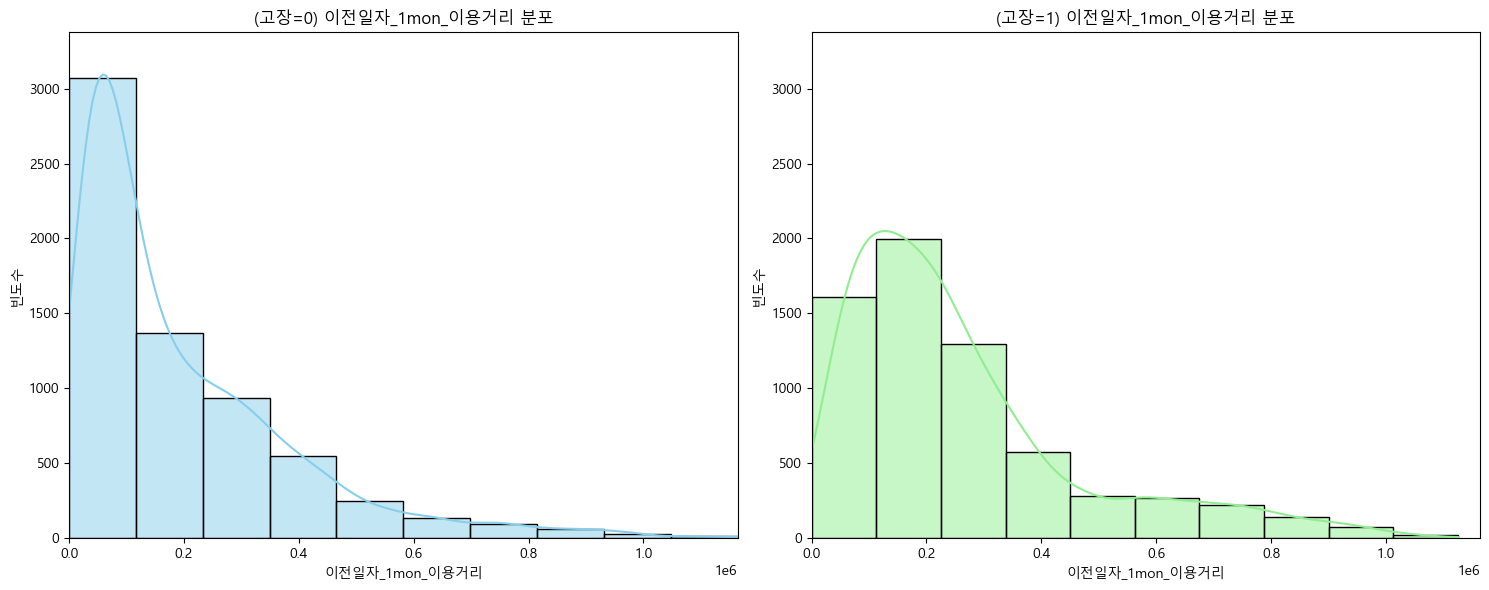

In [49]:
_columns = ['이전일자_1mon_이용거리']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
# create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이전일자_1mon_이용시간(고장=1, 고장=0)  시각화

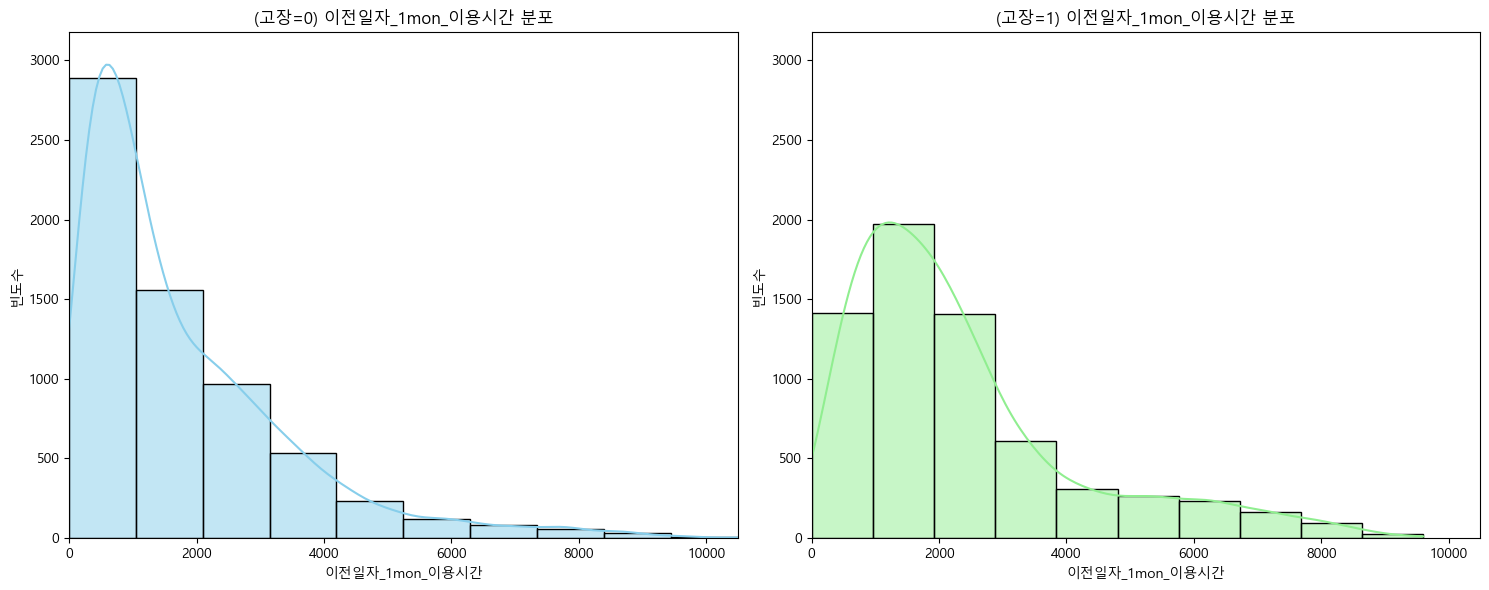

In [50]:
_columns = ['이전일자_1mon_이용시간']
# create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
# create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이전일자_1mon_이용횟수(고장=1, 고장=0) 시각화

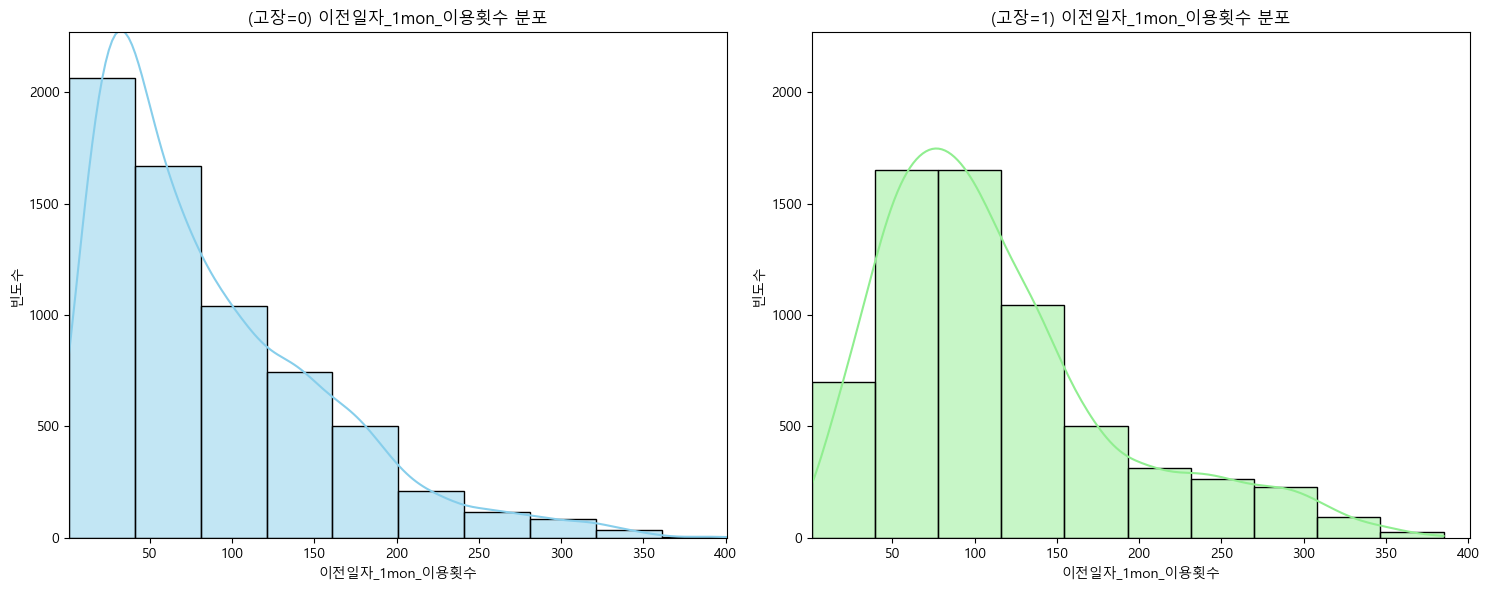

In [51]:
_columns = ['이전일자_1mon_이용횟수']
# create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
# create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이용횟수_비교(고장=1, 고장=0) 시각화

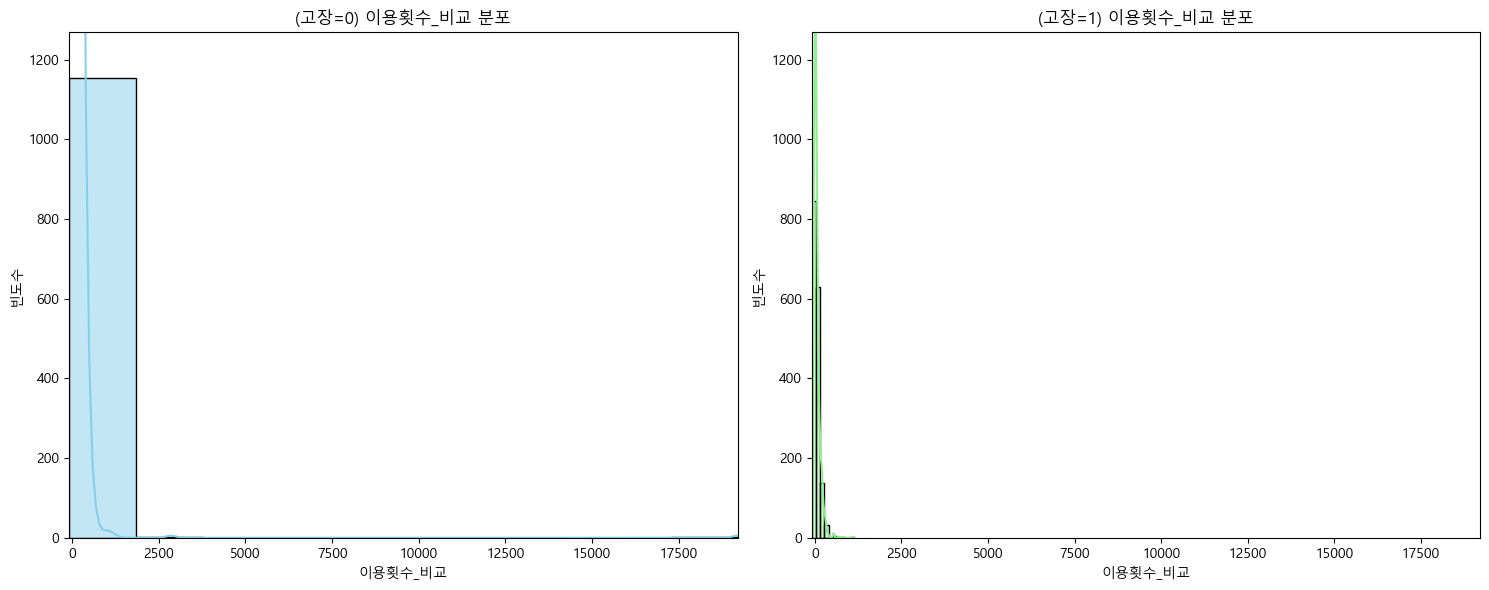

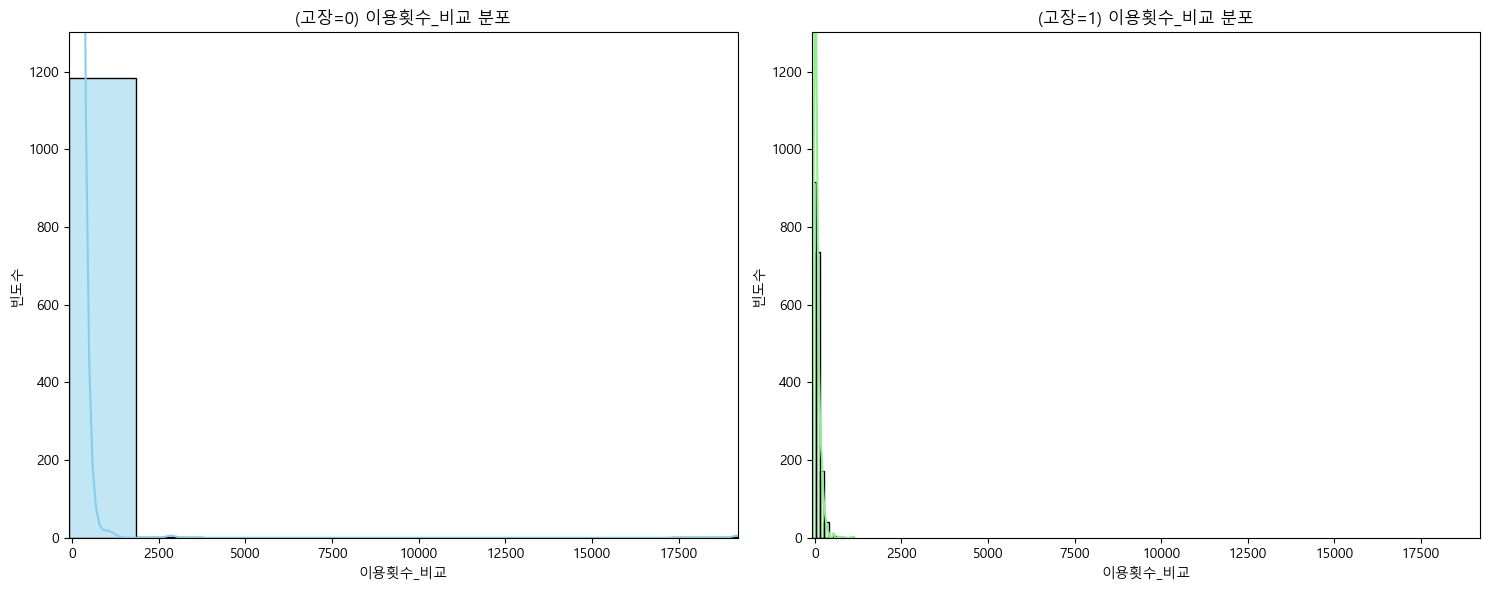

In [52]:
_columns = ['이용횟수_비교']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
#create_bi_subplot(df_Bike_latest_2, _columns)

---
## 이용거리_비교(고장=1, 고장=0) 시각화

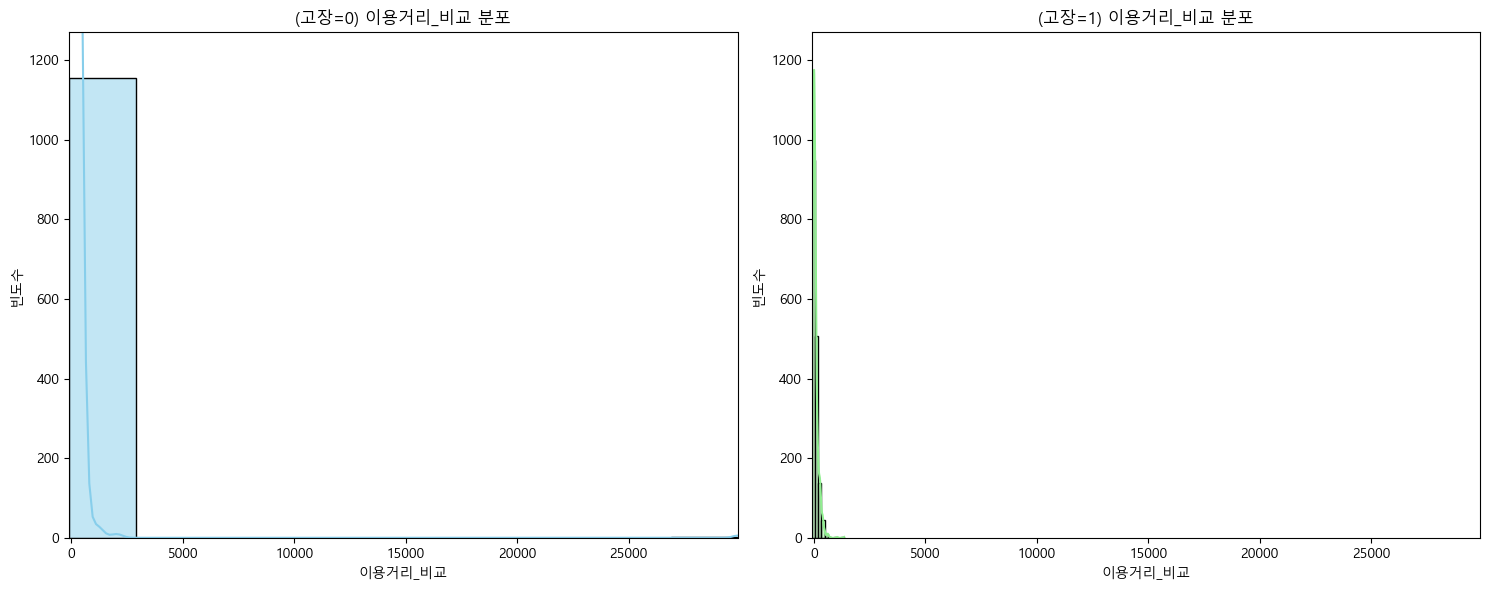

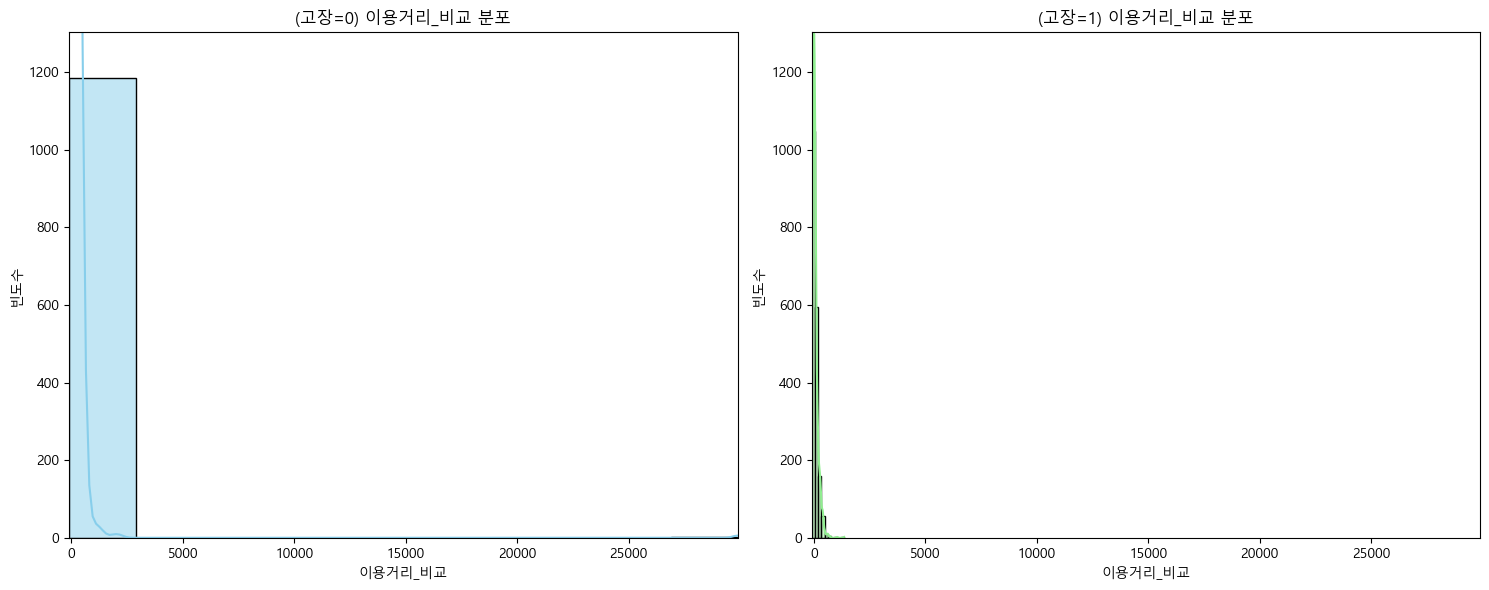

In [53]:
_columns = ['이용거리_비교']
create_bi_subplot(check_outlier(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], '이상패턴_5min_횟수'), _columns)
create_bi_subplot(df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5], _columns)
# create_bi_subplot(df_Bike_latest_2, _columns)

In [54]:
df_Bike_latest_2['이상패턴_5min_횟수'].value_counts().sort_index()[:10]

이상패턴_5min_횟수
0    1238
1    2024
2    2105
3    1933
4    1449
5    1147
6     804
7     567
8     392
9     257
Name: count, dtype: int64

In [55]:
# 고장횟수에 따른 고장여부 비율 계산
cond3 = df_Bike_latest_2['이상패턴_비율'] > 0
df_2 = df_Bike_latest_2[cond3].groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().reset_index()
df_2.columns = ['이상패턴_5min_횟수', '정상(%)', '고장(%)']

result_df_1 = df_2
# 결과 출력
result_df_1.head(20)


,이상패턴_5min_횟수,정상(%),고장(%)
0,1,0.538538,0.461462
1,2,0.545368,0.454632
2,3,0.536472,0.463528
3,4,0.527260,0.472740
4,5,0.514385,0.485615
5,6,0.502488,0.497512
6,7,0.440917,0.559083
7,8,0.431122,0.568878
8,9,0.408560,0.591440
9,10,0.410000,0.590000


In [56]:
# 고장횟수에 따른 고장여부 비율 계산
df_2 = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().reset_index()
df_2.columns = ['이상패턴_5min_횟수', '정상', '고장']

# '이상패턴_5min_횟수'의 각각의 개수 계산
df_counts = df_Bike_latest_2['이상패턴_5min_횟수'].value_counts().reset_index()
df_counts.columns = ['이상패턴_5min_횟수', '전체횟수']

# df_2와 df_counts를 병합
result_df_2 = pd.merge(df_2, df_counts, on='이상패턴_5min_횟수', how='left').sort_values(by = '이상패턴_5min_횟수', ascending = True).head(20)

result_df_2['정상'] = result_df_2['정상'].astype(int)
result_df_2['고장'] = result_df_2['고장'].astype(int)

# 결과 출력
result_df_2.head(20)

,이상패턴_5min_횟수,정상,고장,전체횟수
0,0,663,575,1238
1,1,1090,934,2024
2,2,1148,957,2105
3,3,1037,896,1933
4,4,764,685,1449
5,5,590,557,1147
6,6,404,400,804
7,7,250,317,567
8,8,169,223,392
9,9,105,152,257


In [57]:
pd.concat([result_df_1, result_df_2], axis = 1).head(10)

,이상패턴_5min_횟수,정상(%),고장(%),이상패턴_5min_횟수,정상,고장,전체횟수
0,1,0.538538,0.461462,0.0,663.0,575.0,1238.0
1,2,0.545368,0.454632,1.0,1090.0,934.0,2024.0
2,3,0.536472,0.463528,2.0,1148.0,957.0,2105.0
3,4,0.527260,0.472740,3.0,1037.0,896.0,1933.0
4,5,0.514385,0.485615,4.0,764.0,685.0,1449.0
5,6,0.502488,0.497512,5.0,590.0,557.0,1147.0
6,7,0.440917,0.559083,6.0,404.0,400.0,804.0
7,8,0.431122,0.568878,7.0,250.0,317.0,567.0
8,9,0.408560,0.591440,8.0,169.0,223.0,392.0
9,10,0.410000,0.590000,9.0,105.0,152.0,257.0


---
### 시각화 - 이상패턴 <-> 고장여부

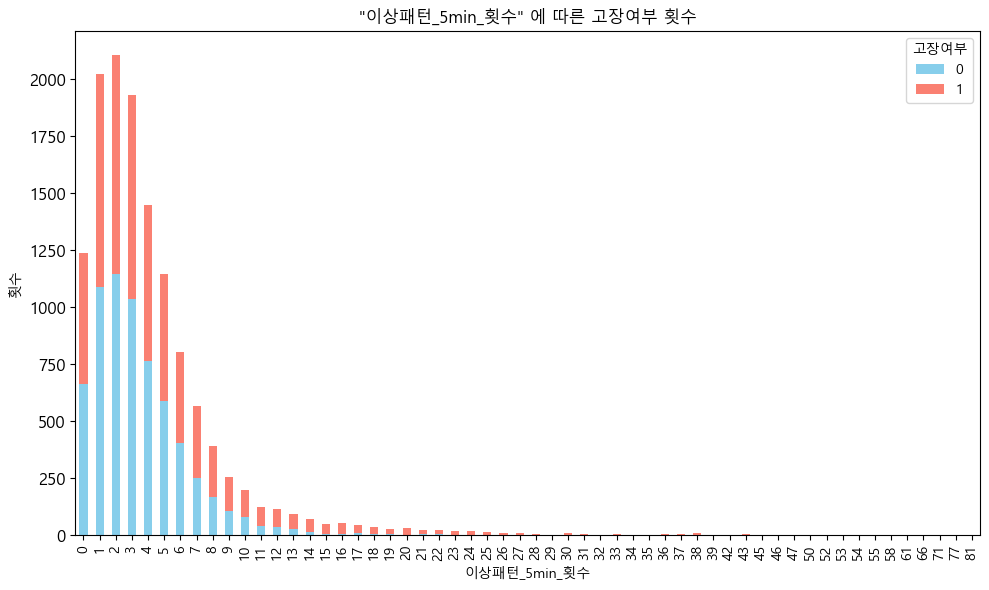

In [58]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 결과 시각화
# result = df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] < 30].groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().fillna(0)
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_5min_횟수')
plt.ylabel('횟수')

# X축과 Y축 눈금 글씨 크기 조정
plt.xticks(fontsize=10)  # X축 눈금 글씨 크기
plt.yticks(fontsize=12)  # Y축 눈금 글씨 크기

plt.title('"이상패턴_5min_횟수" 에 따른 고장여부 횟수')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

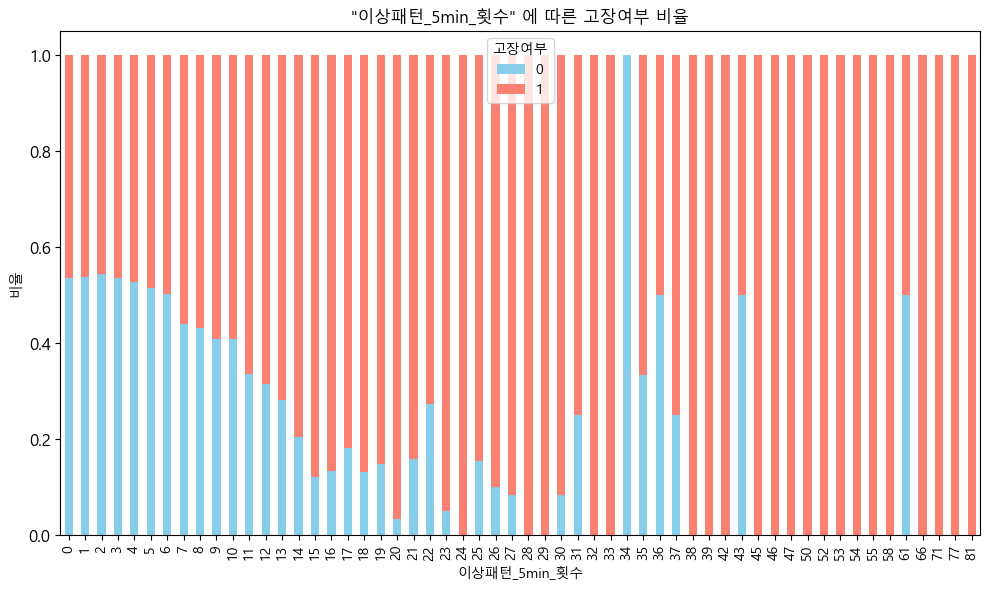

In [59]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().fillna(0)
#result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_5min_횟수')
plt.ylabel('비율')

# X축과 Y축 눈금 글씨 크기 조정
plt.xticks(fontsize=10)  # X축 눈금 글씨 크기
plt.yticks(fontsize=12)  # Y축 눈금 글씨 크기

plt.title('"이상패턴_5min_횟수" 에 따른 고장여부 비율')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

In [60]:
df_Bike_latest_2.head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진)
28418,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,49.0,669926.15,5720.0,64.0,96.916667,2228.937312,231055.877500,-10.23,-1.04,10.23,1.04,0.000000,1
28419,SPB-30090,2024-03-09,2024-02-09,2024-01-09,2024-04-09,,0,1,1,1,126435.51,1063.0,60.0,214730.08,2104.0,37.0,271113.41,2734.0,53.0,96.916667,1713.354428,169539.868333,-38.09,-25.42,38.09,25.42,1.666667,1


In [61]:
df_Bike_latest_3 = pd.get_dummies(df_Bike_latest_2, columns=['고장구분'])

In [62]:
df_Bike_latest_3.head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28418,SPB-30008,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0,0,0,0,228641.47,1732.0,87.0,553440.37,4827.0,49.0,669926.15,5720.0,64.0,96.916667,2228.937312,231055.877500,-10.23,-1.04,10.23,1.04,0.000000,1,True,False,False,False,False,False,False
28419,SPB-30090,2024-03-09,2024-02-09,2024-01-09,2024-04-09,0,1,1,1,126435.51,1063.0,60.0,214730.08,2104.0,37.0,271113.41,2734.0,53.0,96.916667,1713.354428,169539.868333,-38.09,-25.42,38.09,25.42,1.666667,1,True,False,False,False,False,False,False
28420,SPB-30100,2024-05-30,2024-04-30,2024-03-30,2024-06-30,0,3,4,4,397466.93,3465.0,199.0,625579.79,5704.0,52.0,865354.02,8016.0,80.0,127.416667,2128.085889,285621.380833,56.18,39.16,56.18,39.16,1.507538,0,True,False,False,False,False,False,False


In [63]:
df_Bike_latest_3.columns

Index(['자전거번호', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자', '고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이전일자_1mon_이용거리',
       '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이전일자_2mon_이용거리', '이전일자_2mon_이용시간',
       '이전일자_2mon_이용횟수', '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '대여일자_count(mean)', '이용거리(M)_mean(mean)', '이용거리(M)_sum(mean)',
       '이용횟수_비교', '이용거리_비교', '이용횟수_비교(절대값)', '이용거리_비교(절대값)', '이상패턴_비율',
       '이용횟수_비교(이진)', '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인',
       '고장구분_타이어 ', '고장구분_페달'],
      dtype='object')

In [64]:
df_Bike_latest_3.columns
df_Bike_latest_3[['고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '이용횟수_비교', '이용거리_비교', '이용횟수_비교(이진)',
       '이용횟수_비교(절대값)', '이용거리_비교(절대값)',
       '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ',
       '고장구분_페달']].corr()

,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이상패턴_비율,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이용횟수_비교,이용거리_비교,이용횟수_비교(이진),이용횟수_비교(절대값),이용거리_비교(절대값),고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
고장여부,1.000000,0.155549,0.155218,0.156328,-0.099472,0.164350,0.166628,0.191846,-0.071745,-0.015787,0.112199,-0.053622,-0.007935,-1.000000,0.409075,0.160166,0.322738,0.348792,0.321570,0.190795
이상패턴_5min_횟수,0.155549,1.000000,0.996548,0.990183,0.457614,0.227168,0.235522,0.305813,0.107107,0.026955,-0.238753,0.054221,0.014436,-0.155549,-0.036910,0.015550,0.116975,0.130925,0.042624,0.005188
이상패턴_7min_횟수,0.155218,0.996548,1.000000,0.994066,0.448860,0.240912,0.248880,0.319387,0.112724,0.029047,-0.247401,0.058150,0.015922,-0.155218,-0.037309,0.015607,0.115199,0.133070,0.042067,0.005079
이상패턴_10min_횟수,0.156328,0.990183,0.994066,1.000000,0.430629,0.271456,0.279093,0.349368,0.122221,0.032464,-0.261890,0.064755,0.018320,-0.156328,-0.035669,0.013965,0.114257,0.134771,0.040776,0.007029
이상패턴_비율,-0.099472,0.457614,0.448860,0.430629,1.000000,-0.336211,-0.333511,-0.331937,-0.044123,0.003647,0.091574,-0.008461,0.019292,0.099472,-0.116399,-0.007227,0.054972,-0.055739,0.000838,-0.036921
이전일자_1mon_이용거리,0.164350,0.227168,0.240912,0.271456,-0.336211,1.000000,0.981226,0.960213,0.272941,0.111313,-0.421256,0.185436,0.079722,-0.164350,0.043582,0.015767,0.012858,0.178516,0.004639,0.020743
이전일자_1mon_이용시간,0.166628,0.235522,0.248880,0.279093,-0.333511,0.981226,1.000000,0.963152,0.279962,0.110444,-0.428919,0.190798,0.078830,-0.166628,0.045041,0.020798,0.012826,0.180261,0.004070,0.017888
이전일자_1mon_이용횟수,0.191846,0.305813,0.319387,0.349368,-0.331937,0.960213,0.963152,1.000000,0.274479,0.097911,-0.469543,0.172460,0.065165,-0.191846,0.054668,0.019569,0.020084,0.185466,0.016857,0.028540
이용횟수_비교,-0.071745,0.107107,0.112724,0.122221,-0.044123,0.272941,0.279962,0.274479,1.000000,0.425629,-0.273491,0.976124,0.410432,0.071745,-0.043804,-0.011152,-0.021094,0.000919,-0.034260,-0.015843
이용거리_비교,-0.015787,0.026955,0.029047,0.032464,0.003647,0.111313,0.110444,0.097911,0.425629,1.000000,-0.080220,0.422678,0.997658,0.015787,0.005228,-0.005811,-0.009869,-0.000952,-0.014820,-0.007162


In [65]:
df_Bike_latest_4 = df_Bike_latest_3[df_Bike_latest_3['이상패턴_5min_횟수'] > 5]
df_Bike_latest_4.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
28422,SPB-30113,2024-05-30,2024-04-30,2024-03-30,2024-06-30,0,6,6,7,501725.48,3757.0,196.0,952090.56,7296.0,55.0,1400630.42,10824.0,83.0,123.909091,2096.946220,259270.192727,58.18,93.51,58.18,93.51,3.061224,0,True,False,False,False,False,False,False
28432,SPB-30174,2024-05-08,2024-04-08,2024-03-08,2024-06-08,0,8,8,8,379018.26,3109.0,159.0,674157.23,5219.0,50.0,854897.05,6620.0,72.0,135.666667,2192.931736,300030.402500,17.20,26.33,17.20,26.33,5.031447,0,True,False,False,False,False,False,False
28455,SPB-30392,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0,8,8,8,299756.10,2248.0,148.0,592138.43,4781.0,48.0,900638.78,7629.0,75.0,109.750000,2155.722102,243750.267500,34.85,22.98,34.85,22.98,5.405405,0,True,False,False,False,False,False,False
28465,SPB-30476,2024-05-30,2024-04-30,2024-03-30,2024-06-30,0,7,7,8,420417.48,2949.0,170.0,673050.29,5342.0,45.0,988967.65,8119.0,65.0,119.454545,1830.352615,226045.292727,42.31,85.99,42.31,85.99,4.117647,0,True,False,False,False,False,False,False
28478,SPB-30595,2024-05-29,2024-04-29,2024-03-29,2024-06-29,0,6,6,6,369607.70,3049.0,141.0,734277.97,6328.0,54.0,1131852.21,9808.0,80.0,70.200000,1962.316641,158311.406000,100.85,133.47,100.85,133.47,4.255319,0,True,False,False,False,False,False,False


In [66]:
df_Bike_latest_3[df_Bike_latest_3['고장여부'] == 1].head(10)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,대여일자_count(mean),이용거리(M)_mean(mean),이용거리(M)_sum(mean),이용횟수_비교,이용거리_비교,이용횟수_비교(절대값),이용거리_비교(절대값),이상패턴_비율,이용횟수_비교(이진),고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1,2,2,2,98170.92,843.0,74.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0,128.500000,1978.381926,267667.429167,-42.41,-63.32,42.41,63.32,2.702703,1,False,False,False,False,False,False,True
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1,5,5,5,231653.56,2257.0,121.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0,126.750000,1770.825903,235976.111667,-4.54,-1.83,4.54,1.83,4.132231,1,False,False,False,False,False,True,False
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,1,7,8,9,335138.54,2966.0,156.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0,101.000000,2214.580818,230862.455455,54.46,45.17,54.46,45.17,4.487179,0,False,True,False,False,False,False,False
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,1,2,2,2,291259.65,3041.0,153.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0,84.636364,1931.965198,166086.906364,80.77,75.37,80.77,75.37,1.307190,0,False,True,False,False,False,False,False
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,1,7,7,7,253399.66,2755.0,143.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0,77.300000,1651.201903,136984.092000,84.99,84.98,84.99,84.98,4.895105,0,False,True,False,False,False,False,False
5,SPB-30024,2024-04-19,2024-03-19,2024-02-19,2024-05-19,1,7,7,9,114972.03,1191.0,94.0,281703.24,2779.0,47.0,334210.77,3335.0,56.0,112.333333,1863.059396,215941.891667,-16.32,-46.76,16.32,46.76,7.446809,1,False,True,False,False,False,False,False
6,SPB-30026,2024-05-11,2024-04-11,2024-03-11,2024-06-11,1,9,9,9,395081.59,3602.0,200.0,422617.03,3798.0,35.0,502261.39,4516.0,47.0,95.250000,2123.938007,208895.382500,109.97,89.13,109.97,89.13,4.500000,0,False,False,False,False,True,False,False
7,SPB-30031,2024-03-29,2024-02-29,2024-01-29,2024-04-29,1,6,6,7,287903.25,2209.0,122.0,387399.33,3428.0,42.0,454794.67,3992.0,56.0,109.000000,2020.433174,234792.786667,11.93,22.62,11.93,22.62,4.918033,0,False,True,False,False,False,False,False
8,SPB-30036,2024-03-30,2024-02-29,2024-01-30,2024-04-30,1,7,7,7,20429.75,158.0,15.0,20429.75,158.0,4.0,20429.75,158.0,4.0,93.000000,1693.332199,166626.981250,-83.87,-87.74,83.87,87.74,46.666667,1,False,False,False,False,False,True,False
9,SPB-30037,2024-02-21,2024-01-21,2023-12-21,2024-03-21,1,4,4,4,108773.19,1008.0,47.0,108773.19,1008.0,15.0,108773.19,1008.0,15.0,124.454545,2314.559723,290095.928182,-62.24,-62.50,62.24,62.50,8.510638,1,False,False,False,False,False,True,False


df_Bike_latest_4.shape[0] : 3058


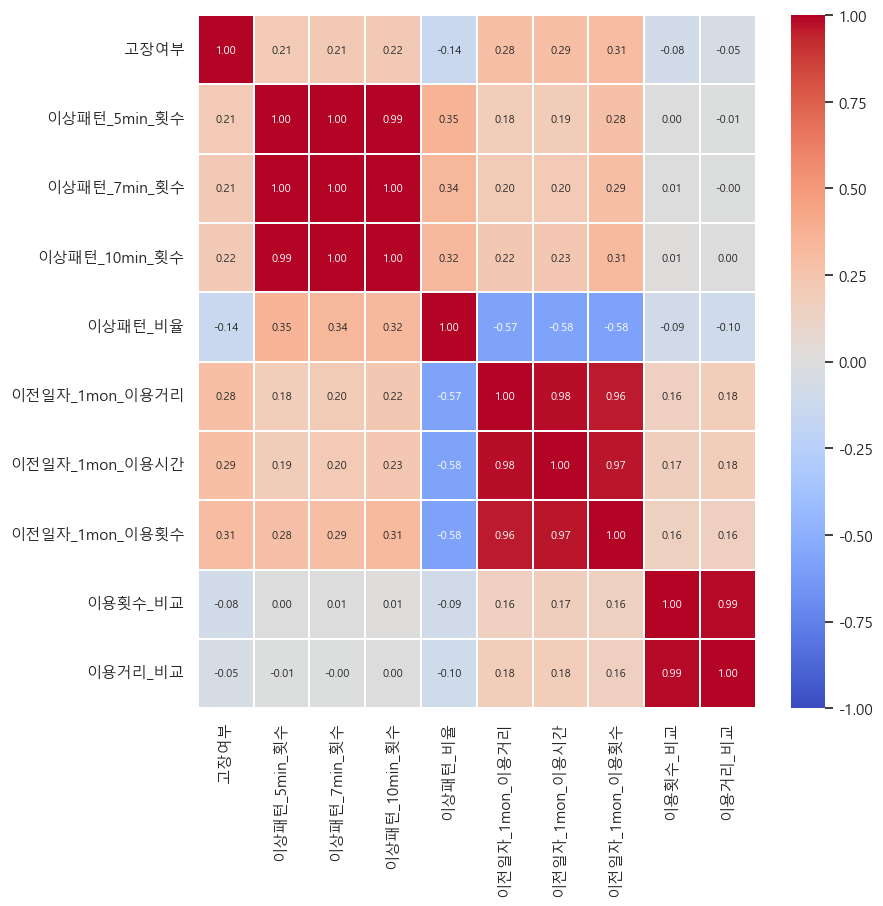

In [73]:
#df_Bike_latest_4 = check_outlier(df_Bike_latest_3[df_Bike_latest_3['이상패턴_5min_횟수'] > 0], '이상패턴_5min_횟수')

cond1 = df_Bike_latest_3['이상패턴_5min_횟수'] > 5
#cond2 = (df_Bike_latest_2['이상패턴_비율'] > 0)
# & (df_Bike_latest_2['이상패턴_비율'] <= 0.5)

# df_Bike_latest_4 = df_Bike_latest_3[cond1 & cond2]
df_Bike_latest_4 = df_Bike_latest_3[cond1]
print(f'df_Bike_latest_4.shape[0] : {df_Bike_latest_4.shape[0]}')

# df_Bike_latest_5 = df_Bike_latest_4[['고장여부',
#        '이상패턴_5min_횟수', '이상패턴_비율',
#        '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
#        '이용횟수_비교', '이용횟수_비교(이진)', '이용거리_비교',
#        '이용횟수_비교(절대값)', '이용거리_비교(절대값)',
#        '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ',
#        '고장구분_페달']].corr()
df_Bike_latest_5 = df_Bike_latest_4[['고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '이용횟수_비교', '이용거리_비교',
       #'이용횟수_비교(이진)', '이용횟수_비교(절대값)', '이용거리_비교(절대값)'
       ]].corr()

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(df_Bike_latest_5,
            annot = True,                     # 상관계수 표시
            annot_kws={"size": 8},
            fmt = '.2f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (9, 9)})       # 그래프 그리기

---
### 조건 별 정확도 테스트

In [70]:
%pip install scikit-learn

     --------------------------------------- 11.0/11.0 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, log_loss

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

_columns = [
    # ['이상패턴_5min_횟수'],
    # ['이상패턴_5min_횟수', '이용횟수_비교'],
    # ['이상패턴_5min_횟수', '이용횟수_비교', '이상패턴_비율'],
    # ['이상패턴_5min_횟수', '이용횟수_비교', '이용거리_비교'],
    # ['이상패턴_5min_횟수', '이상패턴_비율', '이전일자_1mon_이용횟수', '이용횟수_비교'],
    # ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이상패턴_비율'],
    # ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교'],
    # ['이상패턴_10min_횟수', '이전일자_1mon_이용횟수'],

    ['이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율',
       '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수',
       '이용횟수_비교', '이용거리_비교',
       #'이용횟수_비교(이진)', '이용횟수_비교(절대값)', '이용거리_비교(절대값)'
       ],

    #['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이상패턴_비율', '이용횟수_비교(이진)'],
]
for idx in range(0, 10):
    outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > idx]

    for _column in _columns:
        X = np.array(outliers_3[_column]).reshape(-1, len(_column))
        y = np.array(outliers_3['고장여부'])

        # 데이터셋을 학습 세트와 테스트 세트로 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)
        print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

        # 로지스틱 회귀 모델 생성 및 학습
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # 테스트 세트에 대한 예측
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # 모델 평가
        print('======================================')
        print(f'[이상패턴_5min_횟수] : {str(idx)}, [_columns] : {_column}')
        print('테스트 세트 정확도 : ', model.score(X_test, y_test))
        print('classification_report : \n', classification_report(y_test, y_pred))
        print('confusion_matrix : \n', confusion_matrix(y_test, y_pred))
        print(f'Accuracy :  {accuracy_score(y_test, y_pred)}, F1 Score : {f1_score(y_test, y_pred)}, Log Loss : {log_loss(y_test, y_prob)}, Log Loss : {log_loss(y_test, y_prob)}')

2446 612 2446 612
[이상패턴_5min_횟수] : 0, [_columns] : ['이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교']
테스트 세트 정확도 :  0.7941176470588235
classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.53      0.66       237
           1       0.76      0.96      0.85       375

    accuracy                           0.79       612
   macro avg       0.83      0.75      0.76       612
weighted avg       0.82      0.79      0.78       612

confusion_matrix : 
 [[125 112]
 [ 14 361]]
Accuracy :  0.7941176470588235, F1 Score : 0.8514150943396226, Log Loss : 0.5168914153797111, Log Loss : 0.5168914153797111
2446 612 2446 612
[이상패턴_5min_횟수] : 1, [_columns] : ['이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교']
테스트 세트 정확도 :  0.7941176470588235
classification_report : 
            

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.53      0.66       237
           1       0.76      0.96      0.85       375

    accuracy                           0.79       612
   macro avg       0.83      0.75      0.76       612
weighted avg       0.82      0.79      0.78       612

confusion_matrix : 
 [[125 112]
 [ 14 361]]
Accuracy :  0.7941176470588235, F1 Score : 0.8514150943396226, Log Loss : 0.5168914153797111, Log Loss : 0.5168914153797111
2446 612 2446 612
[이상패턴_5min_횟수] : 5, [_columns] : ['이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이상패턴_비율', '이전일자_1mon_이용거리', '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교']
테스트 세트 정확도 :  0.7941176470588235
classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.53      0.66       237
           1       0.76      0.96      0.85       375

    accuracy                           0.79       612
   macro avg  

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [ ]:
df_Bike_latest_3.head(2)

In [ ]:
df_Bike_latest_3.columns

In [ ]:
df_Bike_latest_4 = df_Bike_latest_3

In [ ]:
df_Bike_latest_4.head(5)

---
## 로지스틱회귀 모델링

In [ ]:
# outliers_3 = check_outlier(df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 0], '이상패턴_5min_횟수')
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 1]
#outliers_3 = check_outlier(df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 1], '이상패턴_5min_횟수')


# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 0]
# - 테스트 세트 정확도: 0.7186932849364791
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 1]
# - 테스트 세트 정확도: 0.7407467797162889
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 2]
# - 테스트 세트 정확도: 0.758641600970285
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 3]
# - 테스트 세트 정확도: 0.7893236589790101
# outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 4]
# - 테스트 세트 정확도: 0.8163196776359973
outliers_3 = df_Bike_latest_4[df_Bike_latest_4['이상패턴_5min_횟수'] > 5]
# - 테스트 세트 정확도: 0.8446771378708552

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, log_loss

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# '이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교'
# ============================================================================
# _columns = ['이상패턴_5min_횟수']                                                           # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이상패턴_5min_횟수', '이용횟수_비교']                                           # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수']                                  # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이상패턴_5min_횟수', '이용거리_비교']                                           # 테스트 세트 정확도: 0.8259162303664922
# _columns = ['이용횟수_비교']                                                                # 테스트 세트 정확도: 0.8259162303664922

# _columns = ['이용거리_비교']                                                                # 테스트 세트 정확도: 0.8263525305410122
# _columns = ['이용횟수_비교', '이용거리_비교']                                                # 테스트 세트 정확도: 0.8263525305410122
# _columns = ['이상패턴_5min_횟수', '이용횟수_비교', '이용거리_비교']                           # 테스트 세트 정확도: 0.8294066317626527
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용거리_비교']                  # 테스트 세트 정확도: 0.8328970331588132
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이용거리_비교']  # 테스트 세트 정확도: 0.8442408376963351
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교']                  # 테스트 세트 정확도: 0.8478939157566303
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이용횟수_비교', '이상패턴_비율']  # 테스트 세트 정확도: 0.8478939157566303
# _columns = ['이상패턴_5min_횟수', '이전일자_1mon_이용횟수', '이상패턴_비율', '이용횟수_비교(이진)']  # 테스트 세트 정확도: 0.8478939157566303
_columns = ['이상패턴_5min_횟수', '이용횟수_비교', '이상패턴_비율']                             # 테스트 세트 정확도: 0.8377535101404057
#_columns = ['이상패턴_5min_횟수', '이상패턴_5min_횟수', '이상패턴_5min_횟수', '이용횟수_비교(이진)', '이상패턴_비율']  # 테스트 세트 정확도: 0.8385335413416537

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # 해당 컬럼에만 스케일러 적용
# X = scaler.fit_transform(outliers_3[_columns])

X = np.array(outliers_3[_columns]).reshape(-1, len(_columns))
y = np.array(outliers_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# # 결과 시각화
# plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
# plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
# plt.xlabel('"이상대여패턴"')
# plt.ylabel('고장여부')
# plt.title('"이상대여패턴" 에 따른 고장여부 예측')
# plt.legend()
# plt.show()

# 모델 평가
print('테스트 세트 정확도 : ', model.score(X_test, y_test))
print('confusion_matrix : \n', confusion_matrix(y_test, y_pred))
print('classification_report : \n', classification_report(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))
print("Log Loss : ", log_loss(y_test, y_prob))


In [ ]:
# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### [ 이상패턴 횟수 == 0 ] 것들의 고장여부 비율

In [ ]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_5min_횟수'] > 5]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')